In [88]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from IPython.display import display

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
city_ride_data = pd.merge(ride_data, city_data, how='inner', on='city')

# Display the data table for preview
city_ride_data['type'].value_counts()
city_ride_data.to_csv("output.csv")
#display(city_ride_data.head())

## Bubble Plot of Ride Sharing Data

C:\Users\msatyana\AppData\Local\Continuum\anaconda3\envs\PythonData\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


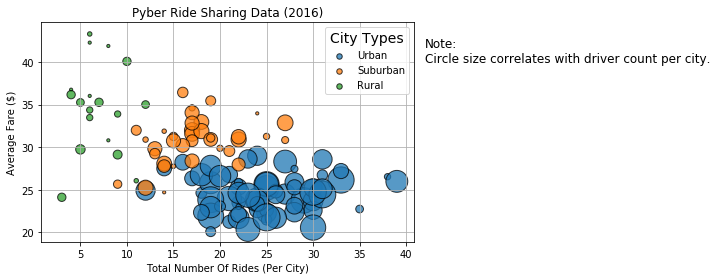

In [101]:
import matplotlib.cm as cm
import matplotlib.colors as col
city_type = city_ride_data['type'].unique()
handle_list = []
cnt = 0

# Loop through all the city types
for i in city_type:
    type_df = city_ride_data.loc[city_ride_data['type']== i, ['city', 'ride_id', 'fare', 'driver_count']]
    total_rides = type_df.groupby(['city'])['ride_id'].count()
    avg_fare = type_df.groupby(['city'])['fare'].mean()
    sizes = type_df.groupby(['city'])['driver_count'].first()*10
    # Build the scatter plots for each city types
    handle = plt.scatter(total_rides, avg_fare, marker="o", color = 'C'+str(cnt),
                         edgecolors="black", s=sizes, alpha=0.75, label=i)
    handle_list.append(handle)
    cnt += 1

# Create a legend
lg = plt.legend(handles=handle_list, loc='best', title='City Types', fancybox=True,shadow=False)
lg.get_title().set_fontsize('14')

for i,_ in enumerate(handle_list):
    lg.legendHandles[i]._sizes = [30]
   

# Add labels to the x and y axes
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number Of Rides (Per City)")
plt.ylabel("Average Fare ($)")

# Incorporate the other graph properties
plt.grid()

# Incorporate a text label regarding circle size
plt.text(42, 40, 'Note:\nCircle size correlates with driver count per city.', fontsize=12)

# Save Figure
plt.savefig("../Images/RideSharingBubblePlot_1.png", bbox_inches="tight")

plt.show()


C:\Users\msatyana\AppData\Local\Continuum\anaconda3\envs\PythonData\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


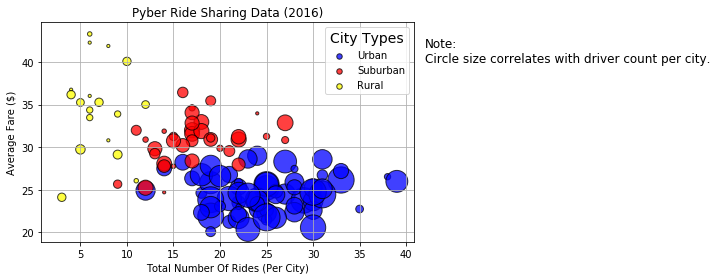

In [102]:
# Obtain the x and y coordinates for each of the three city types


urban_df = city_ride_data.loc[city_ride_data['type']=='Urban',['city', 'ride_id', 'fare', 'driver_count']]
urban_df.head()
u_total_rides = urban_df.groupby(['city'])['ride_id'].count()
u_total_rides
u_avg_fare = urban_df.groupby(['city'])['fare'].mean()
u_avg_fare.head()
sizes = urban_df.groupby(['city'])['driver_count'].first()*10
u = plt.scatter(u_total_rides, u_avg_fare, marker="o", facecolors="blue", edgecolors="black", s=sizes, alpha=0.75, label='Urban')

suburban_df = city_ride_data.loc[city_ride_data['type']=='Suburban',['city', 'ride_id', 'fare', 'driver_count']]
su_total_rides = suburban_df.groupby(['city'])['ride_id'].count()
su_total_rides
su_avg_fare = suburban_df.groupby(['city'])['fare'].mean()
su_avg_fare.head()
sizes = suburban_df.groupby(['city'])['driver_count'].first()*10
su = plt.scatter(su_total_rides, su_avg_fare, marker="o", facecolors="red", edgecolors="black", s=sizes, alpha=0.75, label='Suburban')

rural_df = city_ride_data.loc[city_ride_data['type']=='Rural',['city', 'ride_id', 'fare', 'driver_count']]
rural_df.head()
rural_total_rides = rural_df.groupby(['city'])['ride_id'].count()
rural_total_rides
rural_avg_fare = rural_df.groupby(['city'])['fare'].mean()
rural_avg_fare.head()
sizes = rural_df.groupby(['city'])['driver_count'].first()*10

# Build the scatter plots for each city types
r = plt.scatter(rural_total_rides, rural_avg_fare, marker="o", facecolors="yellow", edgecolors="black", s=sizes, alpha=0.75, label='Rural')

# Add labels to the x and y axes
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number Of Rides (Per City)")
plt.ylabel("Average Fare ($)")

# Incorporate the other graph properties
plt.grid()

# Create a legend
lg = plt.legend(handles=[u, su, r], loc='best', title='City Types', fancybox=True,shadow=False)
lg.get_title().set_fontsize('14')
lg.legendHandles[0]._sizes = [30]
lg.legendHandles[1]._sizes = [30]
lg.legendHandles[2]._sizes = [30]

# Incorporate a text label regarding circle size
plt.text(42, 40, 'Note:\nCircle size correlates with driver count per city.', fontsize=12)

# Save Figure
plt.savefig("../Images/RideSharingBubblePlot_2.png", bbox_inches="tight")
plt.tight_layout()
plt.show()


## Total Fares by City Type

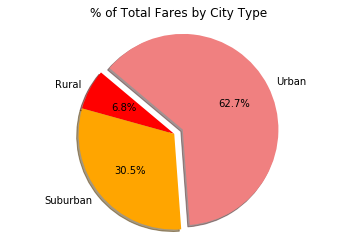

In [83]:
total_fares = city_ride_data.groupby('type')['fare'].sum()
#print(total_fares.keys())

# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0, 0.1)

# The colors of each section of the pie chart
colors = ["red", "orange", "lightcoral"]

plt.pie(total_fares, explode=explode, labels=total_fares.keys(), autopct="%1.1f%%",
        colors= colors, shadow=True, startangle=140)
plt.title('% of Total Fares by City Type')

# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")

# Save Figure
plt.savefig("../Images/TotalFares.png")

plt.show()

## Total Rides by City Type

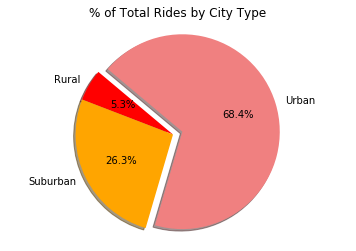

In [84]:
total_rides = city_ride_data.groupby('type')['ride_id'].count()
total_rides

# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0, 0.1)

# Labels for the sections of our pie chart
labels = ["Humans", "Smurfs", "Hobbits", "Ninjas"]

# The colors of each section of the pie chart
colors = ["red", "orange", "lightcoral"]

plt.pie(total_rides, explode=explode, labels=total_rides.keys(), autopct="%1.1f%%",
        colors= colors, shadow=True, startangle=140)
plt.title('% of Total Rides by City Type')

# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")

# Save Figure
plt.savefig("../Images/TotalRides.png")

plt.show()

## Total Drivers by City Type

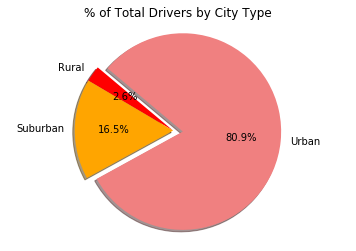

In [87]:
# Calculate Driver Percents
drivers_per_city = city_ride_data.groupby(['type','city'])['driver_count'].first()
drivers_per_city.reset_index()
total_drivers = drivers_per_city.groupby('type').sum()

# Build Pie Charts

# Save Figure

# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0, 0.1)

# The colors of each section of the pie chart
colors = ["red", "orange", "lightcoral"]

plt.pie(total_drivers, explode=explode, labels=total_drivers.keys(), autopct="%1.1f%%",
        colors= colors, shadow=True, startangle=140)
plt.title('% of Total Drivers by City Type')

# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")

# Save Figure
plt.savefig("../Images/TotalDrivers.png")

plt.show()